# Ex3b

Utilizando conceitos de Processamento de Imagens Digitais e Morfologia
Matemática, implemente um método capaz de contar a quantidade de moedas
presentes em imagens (a) e (b).

In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [2]:
# transform a rgb to gray
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [3]:
# convert an image with binary 0 and 1
def binary(image_matrix, thresh_val):
  white = 255
  black = 0

  initial_conv = np.where((image_matrix <= thresh_val), image_matrix, white)
  final_conv = np.where((initial_conv > thresh_val), initial_conv, black)

  return final_conv

In [4]:
# roberts border detect
def roberts(img):
  img = np.asarray(img)
  m, n = img.shape
  img_n = np.zeros([m, n])
  
  Gx = np.array([[1.0,  0.0], [ 0.0, -1.0]])
  Gy = np.array([[0.0, -1.0], [ 1.0,  0.0]])

  for i in range(1, m-2):
      for j in range(1, n-2):
        gx = np.sum(np.multiply(Gx, img[i:i + 2, j:j + 2]))  
        gy = np.sum(np.multiply(Gy, img[i:i + 2, j:j + 2]))  
        img_n[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)

  return img_n.astype(np.uint8)

In [7]:
# get test image
image1 = cv2.imread('/content/coins-2.png')

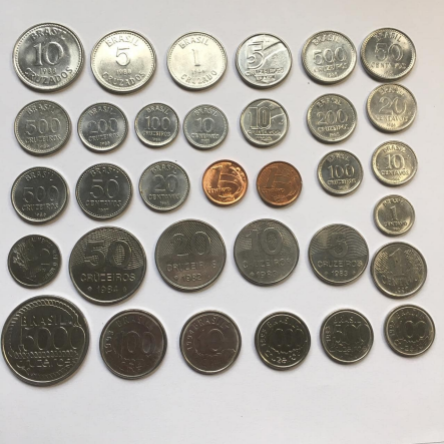

In [8]:
# show image
cv2_imshow(image1)

In [9]:
# transform image to grayscale
image1_g = rgb2gray(image1)

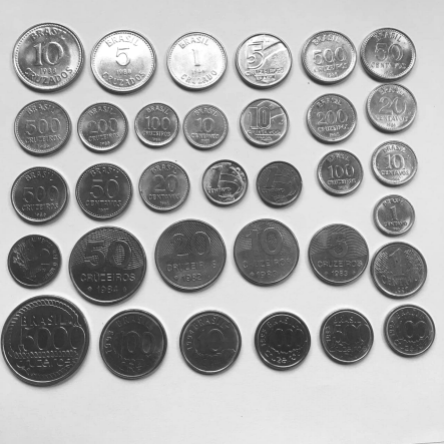

In [10]:
# show image
cv2_imshow(image1_g)

In [46]:
# transform image to binary
image1_b = binary(image1_g, 190)

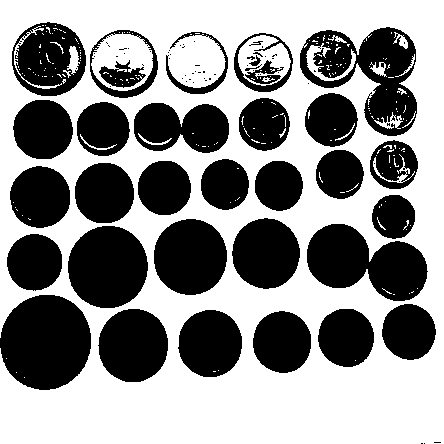

In [47]:
# show image
cv2_imshow(image1_b)

In [48]:
# apply roberts edge detector
image1_e = roberts(image1_b)

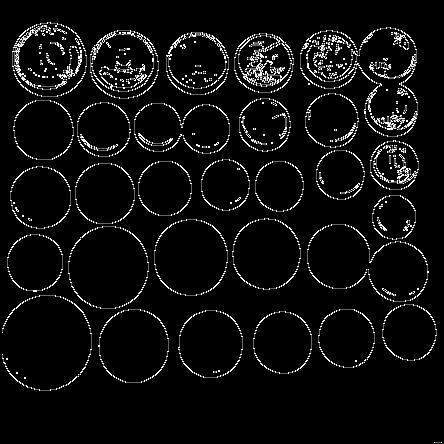

In [50]:
# show image
cv2_imshow(image1_e)

In [51]:
# counts countours from image
(image1_count, _) = cv2.findContours(image1_e, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

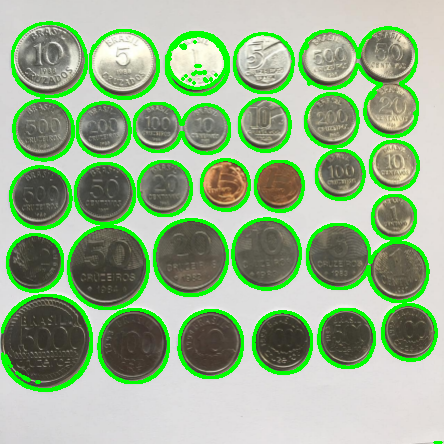

In [52]:
# draw countours
cv2.drawContours(image1, image1_count, -1, (0, 255, 0), 2)
cv2_imshow(image1)

In [53]:
# print how many coins were found
print("Found %i coins" % len(image1_count))

Found 34 coins
